In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

df = pd.read_csv('fraud_prediction.csv')
df = df.drop(['Unnamed: 0'],axis = 1)

In [2]:
features = df.drop('amount', axis = 1).values
target = df['amount'].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [4]:
dt_reg= DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 0.2,random_state = 50)

In [5]:
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=50, splitter='best')

In [6]:
dt_reg.score(X_test,y_test)

0.2959487488702387

In [7]:
feature_names = df.drop('amount', axis = 1)

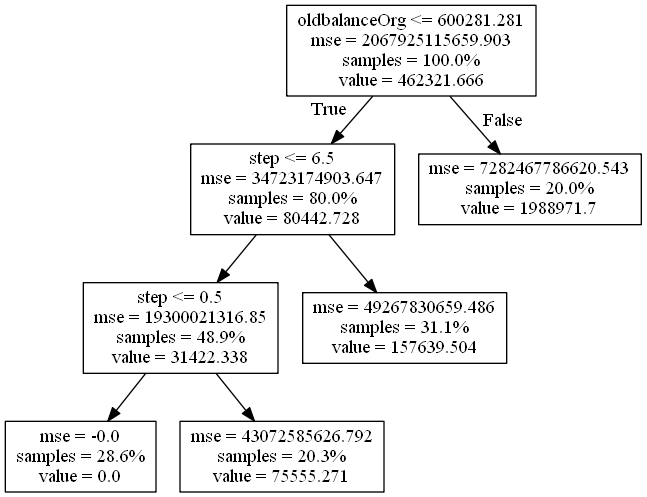

In [8]:
data = tree.export_graphviz(dt_reg, out_file=None, feature_names= feature_names.columns.values, proportion= True)

graph = pydotplus.graph_from_dot_data(data) 

Image(graph.create_png())